In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
import os

from slgnn.models.gcn.model import GIN_DISMAT
from torch_geometric.data import DataLoader
from slgnn.data_processing.pdbds_ligands_dataset import PDBLigands, ThreeDimensionOneHot
from random import shuffle
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(rc={'figure.figsize':(13,8.27)})

In [265]:
device = "cuda:2"
model = GIN_DISMAT(6, 30, 70, {"hidden_units": 32}).to(device)

In [6]:
dataset = PfamLigands(root=os.path.join("..", "data", "pfam"), transform=ThreeDimensionOneHot(30))
# dataset = PfamLigands(root=os.path.join("..", "data", "pfam"))
datalen = dataset.len()
data_indices = list(range(dataset.len()))
shuffle(data_indices)
dl1 = DataLoader(dataset[data_indices[:int(datalen*0.9)]], batch_size=256, shuffle=True)
dl2 = DataLoader(dataset[data_indices[int(datalen*0.9):]], batch_size=256)

In [266]:
lr = 0.00001
print(f"lr now: {lr}")

lr now: 1e-05


In [267]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [268]:
train_losses = list()

In [269]:
_ = model.train()
n_epochs = 1
for e in range(n_epochs):
    for step, batch in enumerate(dl1):
        data = batch.to(device)
        output = model(data.x, data.edge_index, data.batch)
        output = torch.flatten(output, end_dim=1)
        output = torch.softmax(output, dim=2)
        loss = torch.nn.functional.binary_cross_entropy(output, data.y)
#         loss = torch.nn.functional.binary_cross_entropy(output, data.y, weight=data.mask)
        print(f"Epoch: {e+1}/{n_epochs} Step: {step}/278 training loss: {loss.item():.4}     ", end="\r")
        train_losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

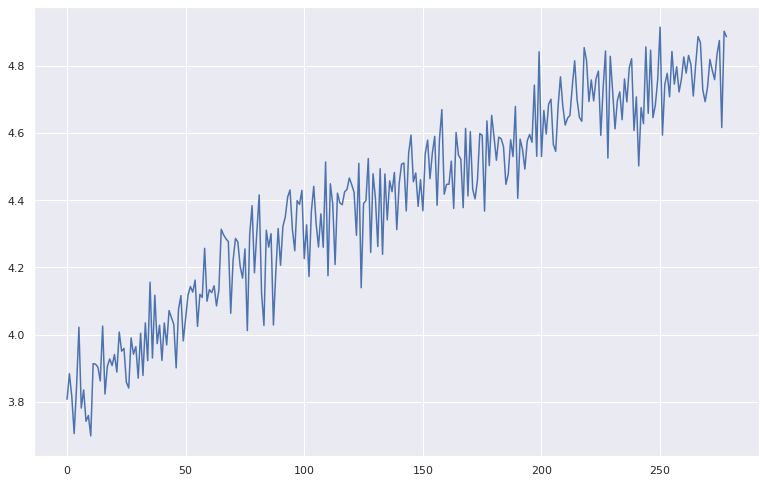

In [270]:
plt.plot(list(range(len(train_losses))), train_losses)

In [171]:
_ = model.eval()

In [172]:
for eval_batch in dl2:
    data = eval_batch.to(device)
    output = model(data.x, data.edge_index, data.batch)
    output = torch.softmax(output, dim=2)
    loss = torch.nn.functional.binary_cross_entropy(output, data.y)
    print(f"eval loss: {loss.item()}     ", end="\r")

/raid/home/yangliu/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Using a target size (torch.Size([17920, 70, 30])) that is different to the input size (torch.Size([256, 70, 70, 30])) is deprecated. Please ensure they have the same size.
  """


RuntimeError: The size of tensor a (70) must match the size of tensor b (17920) at non-singleton dimension 1

In [24]:
eva_data = dataset[58519]
_, eva_hm = torch.max(eva_data.y, 2)

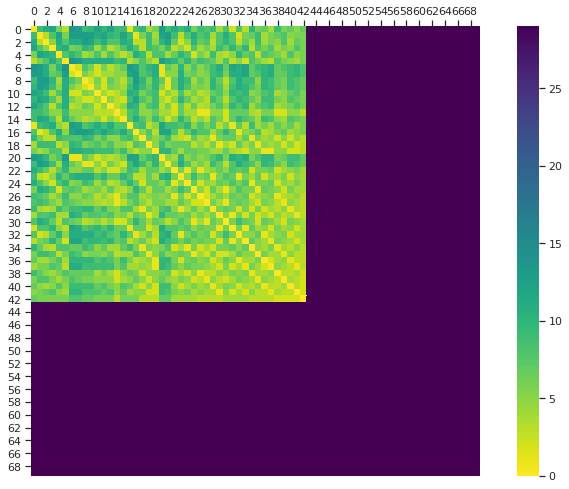

In [25]:
ax = sns.heatmap(eva_hm.numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

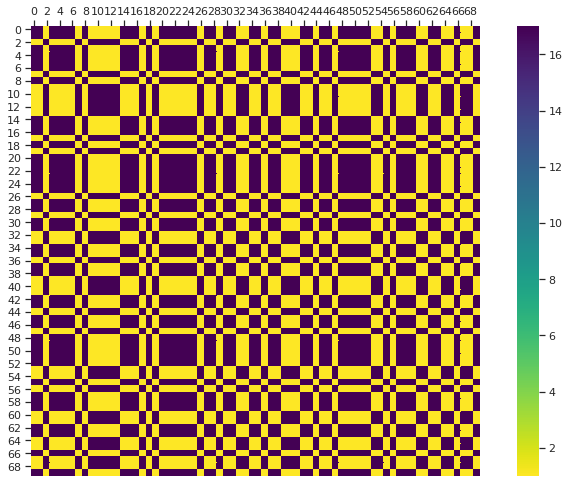

In [254]:
eva_dl = DataLoader([eva_data])

for eva_batch in eva_dl:
    pass

eva_data_gpu = eva_batch.to("cuda:1")
output0 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)

output0 = output0.view([70, 70, 30])
output0 = torch.softmax(output0, axis=2)

_, output0 = torch.max(output0, 2)
ax = sns.heatmap(output0.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

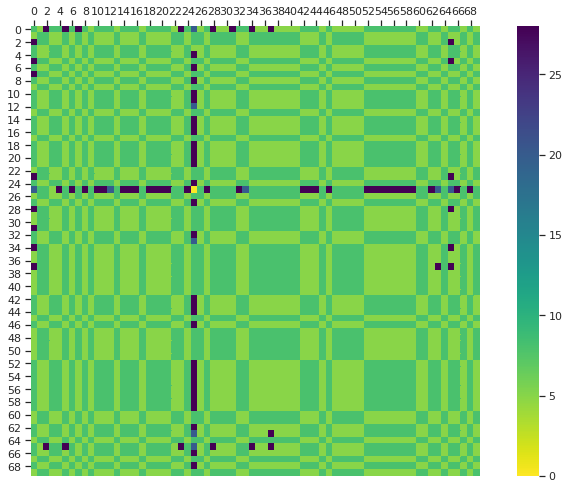

In [182]:
eva_data_gpu = eva_batch.to("cuda:1")
output0 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)

output0 = output0.view([70, 70, 30])
output0 = torch.softmax(output0, axis=2)

_, output0 = torch.max(output0, 2)
ax = sns.heatmap(output0.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

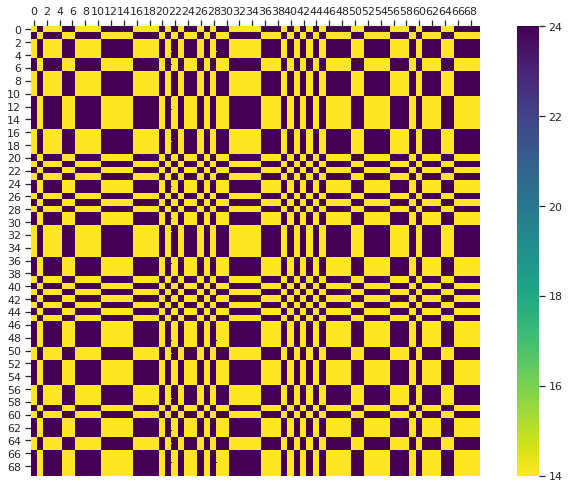

In [51]:
eva_data_gpu = eva_batch.to("cuda:1")
output2 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)

output2 = torch.softmax(output2, axis=2)

_, output2 = torch.max(output2, 2)
ax = sns.heatmap(output2.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

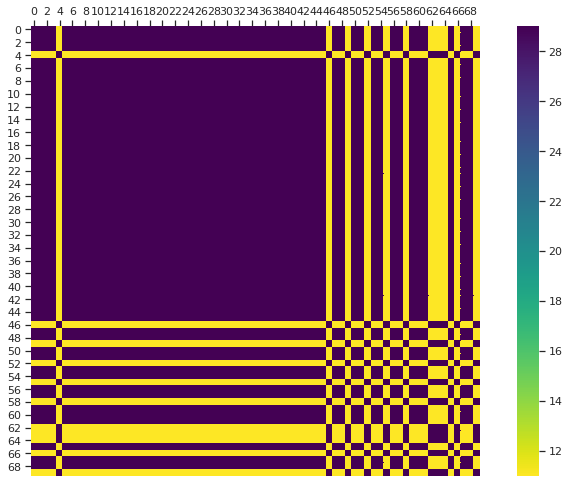

In [34]:
eva_data_gpu = eva_batch.to("cuda:1")
output3 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)

output3 = torch.softmax(output3, axis=2)

_, output3 = torch.max(output3, 2)
ax = sns.heatmap(output3.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

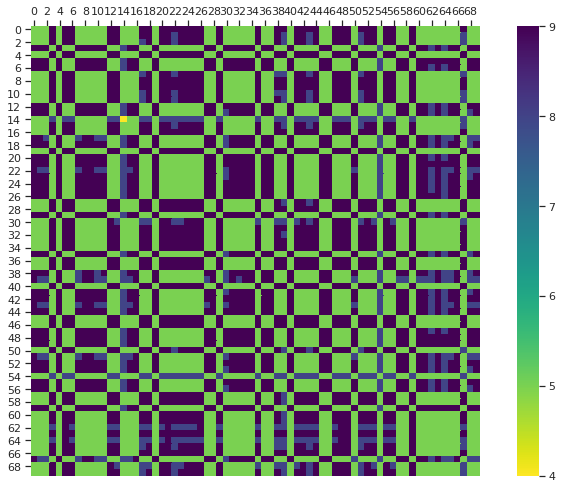

In [241]:
eva_data_gpu = eva_batch.to("cuda:1")
output4 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)

output4 = torch.softmax(output4, axis=2)

_, output4 = torch.max(output4, 2)
ax = sns.heatmap(output4.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

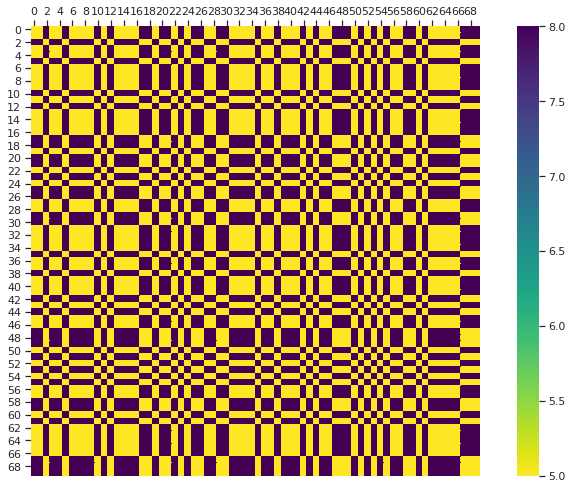

In [246]:
eva_data_gpu = eva_batch.to("cuda:1")
output5 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)

output5 = torch.softmax(output5, axis=2)

_, output5 = torch.max(output5, 2)
ax = sns.heatmap(output5.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

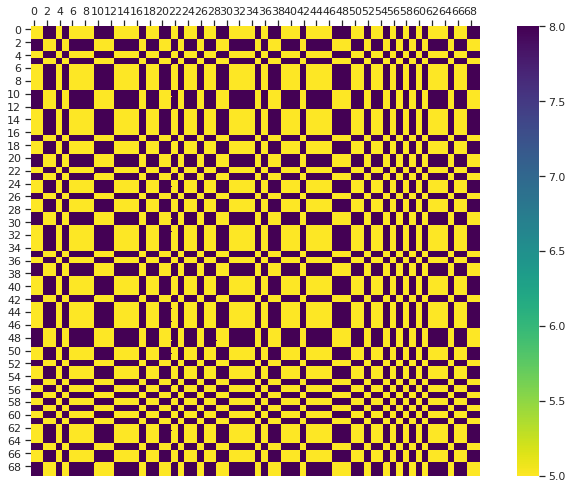

In [248]:
tr_data = dataset[55883]
_, eva_hm = torch.max(tr_data.y, 2)

tr_dl = DataLoader([tr_data])

for tr_batch in tr_dl:
    pass

tr_data_gpu = tr_batch.to("cuda:1")
output6 = model(tr_data_gpu.x, tr_data_gpu.edge_index, tr_data_gpu.batch)

output6 = torch.softmax(output6, axis=2)

_, output6 = torch.max(output6, 2)
ax = sns.heatmap(output6.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

In [230]:
output2[0, :]

tensor([5, 5, 8, 5, 5, 8, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 8, 5, 5, 8, 8, 5, 8,
        5, 5, 8, 5, 5, 8, 8, 5, 5, 5, 5, 8, 5, 5, 8, 5, 5, 5, 8, 5, 8, 5, 5, 8,
        5, 8, 5, 5, 5, 5, 5, 8, 5, 8, 5, 8, 5, 8, 5, 5, 5, 5, 5, 8, 8, 5],
       device='cuda:1')

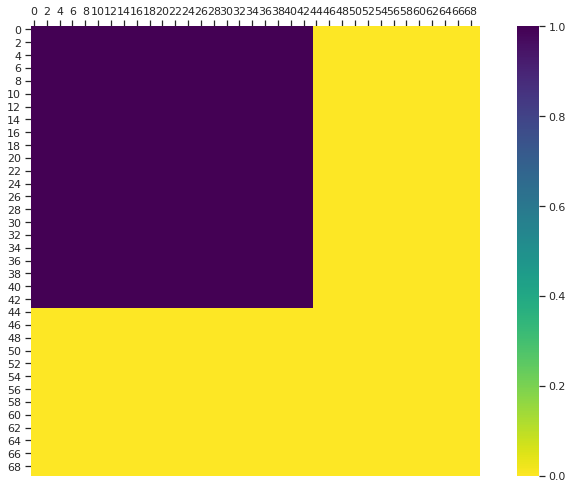

In [136]:
hm, _ = torch.max(eva_data.mask, 2)
ax = sns.heatmap(hm.numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

In [91]:
eva_dl = DataLoader([eva_data, eva_data], batch_size=2)

for eva_batch in eva_dl:
    pass

eva_batch

eva_data_gpu = eva_batch.to("cuda:1")
output0 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)

output0 = torch.softmax(output0, axis=2)

_, output0 = torch.max(output0, 2)
ax = sns.heatmap(output0.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

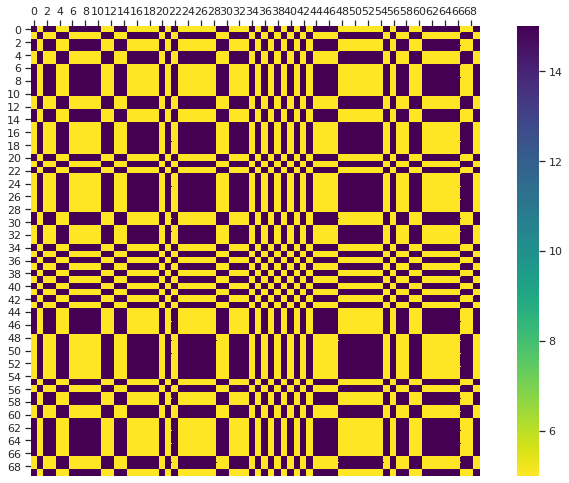

In [97]:
output1 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)
output1 = torch.softmax(output1, axis=2)
_, output1 = torch.max(output1, 2)
ax = sns.heatmap(output1.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

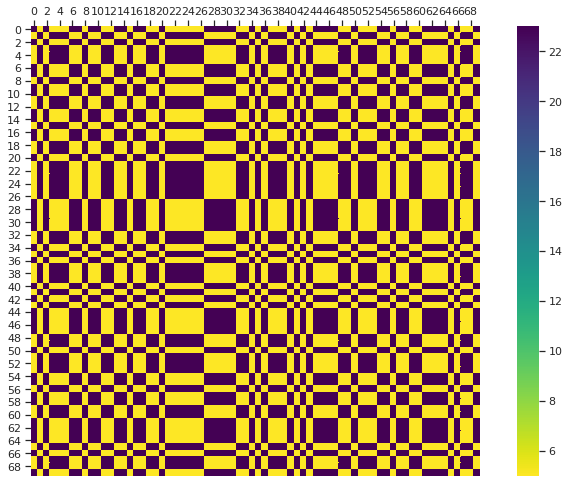

In [105]:
output2 = model(eva_data_gpu.x, eva_data_gpu.edge_index, eva_data_gpu.batch)
output2 = torch.softmax(output2, axis=2)
_, output2 = torch.max(output2, 2)
ax = sns.heatmap(output2.to("cpu").detach().numpy(),
    square=True,
    cmap="viridis_r",
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()

In [247]:
data_indices[:int(datalen*0.9)][0]

55883

In [250]:
output2.size()

torch.Size([70, 70])

In [252]:
dataset[0].y.size()

torch.Size([70, 70, 30])

In [201]:
a = torch.arange(18).view([2, 3, 3])
# b = torch.ones([5])
b = torch.arange(10).view([2, 5])

In [202]:
a

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [232]:
b

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [233]:
b_repeat = b.repeat_interleave(9, dim=0)

In [234]:
b_repeat = b_repeat.view(2, 3, 3, -1)

In [235]:
b_repeat.size()

torch.Size([2, 3, 3, 5])

In [236]:
a_repeat = a.repeat_interleave(5, dim=2)

In [237]:
a_repeat.size()

torch.Size([2, 3, 15])

In [238]:
a_repeat = a_repeat.view(2, 3, -1, 5)

In [239]:
product = a_repeat * b_repeat

In [240]:
product.size()

torch.Size([2, 3, 3, 5])

In [231]:
product[0, 0, 0]

tensor([0, 0, 0, 0, 0])

In [227]:
a_repeat

tensor([[[[ 0,  0,  0,  0,  0],
          [ 1,  1,  1,  1,  1],
          [ 2,  2,  2,  2,  2]],

         [[ 3,  3,  3,  3,  3],
          [ 4,  4,  4,  4,  4],
          [ 5,  5,  5,  5,  5]],

         [[ 6,  6,  6,  6,  6],
          [ 7,  7,  7,  7,  7],
          [ 8,  8,  8,  8,  8]]],


        [[[ 9,  9,  9,  9,  9],
          [10, 10, 10, 10, 10],
          [11, 11, 11, 11, 11]],

         [[12, 12, 12, 12, 12],
          [13, 13, 13, 13, 13],
          [14, 14, 14, 14, 14]],

         [[15, 15, 15, 15, 15],
          [16, 16, 16, 16, 16],
          [17, 17, 17, 17, 17]]]])

In [228]:
b_repeat

tensor([[[[0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4]],

         [[0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4]],

         [[0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4]]],


        [[[5, 6, 7, 8, 9],
          [5, 6, 7, 8, 9],
          [5, 6, 7, 8, 9]],

         [[5, 6, 7, 8, 9],
          [5, 6, 7, 8, 9],
          [5, 6, 7, 8, 9]],

         [[5, 6, 7, 8, 9],
          [5, 6, 7, 8, 9],
          [5, 6, 7, 8, 9]]]])

In [117]:
b.expand_as(a)

RuntimeError: The expanded size of the tensor (3) must match the existing size (5) at non-singleton dimension 2.  Target sizes: [2, 3, 3].  Tensor sizes: [5]

In [106]:
a[0]

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [101]:
a[0].size()

torch.Size([3, 3])